In [1054]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1055]:
df_train=pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1056]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1057]:
data=pd.concat([df_train.iloc[:,:-1],df_test],axis=0)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [1058]:
data=data.drop(columns=['Id'],axis=1)

In [1059]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [1060]:
data.shape

(2919, 79)

In [1061]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [1062]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [1063]:
data.isnull().sum().sum()

13965

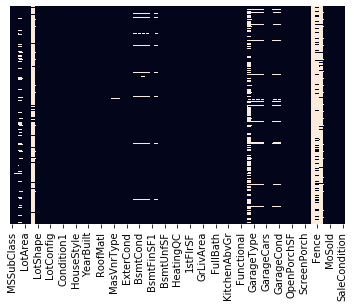

In [1064]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False) 

In [1065]:
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['Alley']=data['Alley'].fillna(data['Alley'].mode()[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
data['PoolQC']=data['PoolQC'].fillna(data['PoolQC'].mode()[0])
data['Fence']=data['Fence'].fillna(data['Fence'].mode()[0])
data['MiscFeature']=data['MiscFeature'].fillna(data['MiscFeature'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mean())
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mode()[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

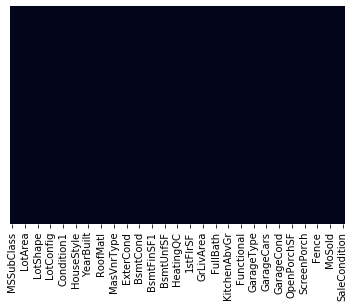

In [1066]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False) 

In [1067]:
data.isnull().sum().sum()

0

In [1068]:
def ObjectColumns(df):
    a=[col for col in df.columns if df[col].dtype == "object"]
    return a

def Dummies(df,cat_cols):
    return pd.get_dummies(df,columns = cat_cols)

In [1069]:
cat_cols = ObjectColumns(data)
data = Dummies(data,cat_cols)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [1070]:
len(cat_cols1)

43

In [1071]:
data.shape

(2919, 288)

In [1072]:
train_data=data.iloc[:1460,:]
test_data=data.iloc[1460:,:]
print(train_data.shape)
test_data.shape

(1460, 288)


(1459, 288)

In [1073]:
x=train_data
y=df_train['SalePrice']

In [1016]:
from sklearn.datasets import make_regression

# linear Regression

In [1017]:
from sklearn.linear_model import LinearRegression

In [1018]:
lr=LinearRegression()

In [1019]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1020]:
lr_pri=lr.predict(test_data)
lr_pri

array([112406.42793054, 151829.42651547, 186990.96005143, ...,
       179451.44455983, 108800.96834566, 222526.60454603])

In [1021]:
lr.score(x,y)

0.9323329633208586

# GradientBoostingRegressor

In [1022]:
x=train_data
y=df_train['SalePrice']

In [1023]:
from sklearn.ensemble import GradientBoostingRegressor

In [1024]:
reg = GradientBoostingRegressor(random_state=0)

In [1025]:
reg.fit(x, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1026]:
reg_pri=reg.predict(test_data)
reg_pri

array([121190.45153262, 164655.0059832 , 176787.32280134, ...,
       158427.35527146, 123229.72953422, 234823.84264911])

In [1027]:
reg.score(x,y)

0.9663416371823205

In [1082]:
x=train_data
y=df_train['SalePrice']
import xgboost
xg=xgboost.XGBRegressor()
xg.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1083]:
xg_pri=xg.predict(test_data)
xg_pri

array([120073.72, 150026.14, 181068.9 , ..., 163205.08, 110559.51,
       226173.02], dtype=float32)

In [1090]:
xg.score(x,y)

0.9994840154906652

In [1084]:
sale=pd.DataFrame(xg_pri)

In [1085]:
df_sub=pd.read_csv('sample_submission.csv')

In [1086]:
data_sub=pd.concat([df_sub['Id'],sale],axis=1)
data_sub.columns=['Id','SalePrice']

In [1087]:
data_sub.to_csv('sample_submission.csv',index=False)

In [1088]:
df_sub.shape

(1459, 2)

In [1089]:
df_sub.head()

,Id,SalePrice
0,1461,120073.72
1,1462,150026.14
2,1463,181068.90
3,1464,206041.80
4,1465,194450.27
